# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Wahyu Pelita Jaya
- **Email:** wahyupelitajaya1@gmail.com
- **ID Dicoding:** wahyupj

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penyewaan sepeda dalam sehari? Jam berapa penyewaan sepeda paling banyak terjadi?
Tujuan: Mengetahui pola penggunaan sepeda berdasarkan jam untuk memahami waktu-waktu sibuk.

- Bagaimana pengaruh faktor cuaca terhadap jumlah penyewaan sepeda?
 Tujuan: Melihat hubungan antara cuaca (suhu, kelembaban, dan kecepatan angin) terhadap jumlah penyewaan sepeda.

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

**Mempersiapkan Dataset yang akan di Analisis**

In [3]:
# Load dataset harian dari repository github (day.csv)
day_df = pd.read_csv("https://raw.githubusercontent.com/wahyupelitajaya/Dicoding-Submission-Analysis-Data/refs/heads/main/data/day.csv")

# Cek apakah berhasil di import atau tidak dengan cara menampilkan dataset
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [8]:
# Load dataset jam-an dari repository github (hour.csv)
hour_df = pd.read_csv("https://raw.githubusercontent.com/wahyupelitajaya/Dicoding-Submission-Analysis-Data/refs/heads/main/data/hour.csv")

# Cek apakah berhasil di import atau tidak dengan cara menampilkan dataset
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Menilai Data day.csv

In [7]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
1. Tidak ada Missing Values : Semua kolom memiliki jumlah entri non-null yang sama dengan total jumlah baris (731), sehingga dataset ini bersih dari Missing Values
2. Dominasi tipe data numerik : Sebagian besar kolom adalah numerik (int64 atau float64), yang cocok untuk analisis statistik atau pemodelan prediktif.
3. Tanggal dalam format String : Kolom 'dteday' masih bertipe object(text), yang memerlukan konversi ke tipe data datetime untuk analisis waktu / berbasis tanggal

**Memeriksa apakah terdapat duplikasi data**

In [ ]:
print("Jumlah duplikasi : ", day_df.duplicated().sum())

Jumlah duplikasi :  0


**Insight:**
Tidak terdapat duplikasi data

**Menampilkan ringkasan parameter statistik untuk mengetahui apakah terdapat innacurate value**

In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight: Tidak ditemukan adanya innacurate value**

#### Menilai data hour.csv

**Melihat Informasi Dataset**

In [9]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
1. Tidak ada Missing Values : Semua kolom memiliki jumlah entri non-null yang sama dengan total jumlah baris (17.379), sehingga dataset ini bersih dari Missing Values
2. Dominasi tipe data numerik : Sebagian besar kolom adalah numerik (int64 atau float64), yang cocok untuk analisis statistik atau pemodelan prediktif.
3. Tanggal dalam format String : Kolom 'dteday' masih bertipe object(text), yang memerlukan konversi ke tipe data datetime untuk analisis waktu / berbasis tanggal

**Memeriksa apakah terdapat duplikasi data**

In [14]:
print("Jumlah duplikasi : ", hour_df.duplicated().sum())

Jumlah duplikasi :  0


**Insight:**
Tidak terdapat duplikasi data

**Menampilkan ringkasan parameter statistik untuk mengetahui apakah terdapat innacurate value**

In [15]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight: Tidak ditemukan adanya innacurate value**

**KESIMPULAN:** Tidak terdapat keanehan pada kedua dataset, hanya perlu merubah tipe data dteday (object) menjadi (datetime) di kedua dataset.

### Cleaning Data

=====================================

----------------- Dataset characteristics -----------------

=====================================

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

**Menampilkan info data harian (day.csv) sebelum di cleaning**

In [32]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   instant          731 non-null    int64         
 1   tanggal          731 non-null    datetime64[ns]
 2   season           731 non-null    int64         
 3   yr               731 non-null    int64         
 4   mnth             731 non-null    int64         
 5   holiday          731 non-null    int64         
 6   weekday          731 non-null    int64         
 7   workingday       731 non-null    int64         
 8   cuaca            731 non-null    int64         
 9   suhu             731 non-null    float64       
 10  atemp            731 non-null    float64       
 11  kelembaban       731 non-null    float64       
 12  kecepatan_angin  731 non-null    float64       
 13  casual           731 non-null    int64         
 14  registered       731 non-null    int64    

**Mengganti tipe data kolom dteday (object) menjadi (datetime)**

In [22]:
# dataset harian (day.csv)
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [24]:
# dataset jam-an (hour.csv)
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Rename nama kolom agar memudahkan proses

In [28]:
# Rename kolom untuk kemudahan
day_df.rename(columns={
    'dteday': 'tanggal',
    'weathersit': 'cuaca',
    'temp': 'suhu',
    'hum': 'kelembaban',
    'windspeed': 'kecepatan_angin',
    'cnt': 'total_sewa'
}, inplace=True)

hour_df.rename(columns={
    'dteday': 'tanggal',
    'hr': 'jam',
    'weathersit': 'cuaca',
    'temp': 'suhu',
    'hum': 'kelembaban',
    'windspeed': 'kecepatan_angin',
    'cnt': 'total_sewa'
}, inplace=True)

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   instant          731 non-null    int64         
 1   tanggal          731 non-null    datetime64[ns]
 2   season           731 non-null    int64         
 3   yr               731 non-null    int64         
 4   mnth             731 non-null    int64         
 5   holiday          731 non-null    int64         
 6   weekday          731 non-null    int64         
 7   workingday       731 non-null    int64         
 8   cuaca            731 non-null    int64         
 9   suhu             731 non-null    float64       
 10  atemp            731 non-null    float64       
 11  kelembaban       731 non-null    float64       
 12  kecepatan_angin  731 non-null    float64       
 13  casual           731 non-null    int64         
 14  registered       731 non-null    int64    

**Insight:**
- Kolom tanggal sudah diubah ke format datetime untuk analisis time-series.
- Data sekarang siap diproses.

## Exploratory Data Analysis (EDA)

#### Pengaruh Jam (hour.csv)

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 128341 (\N{CLOCK FACE SIX OCLOCK}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128341 (\N{CLOCK FACE SIX OCLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


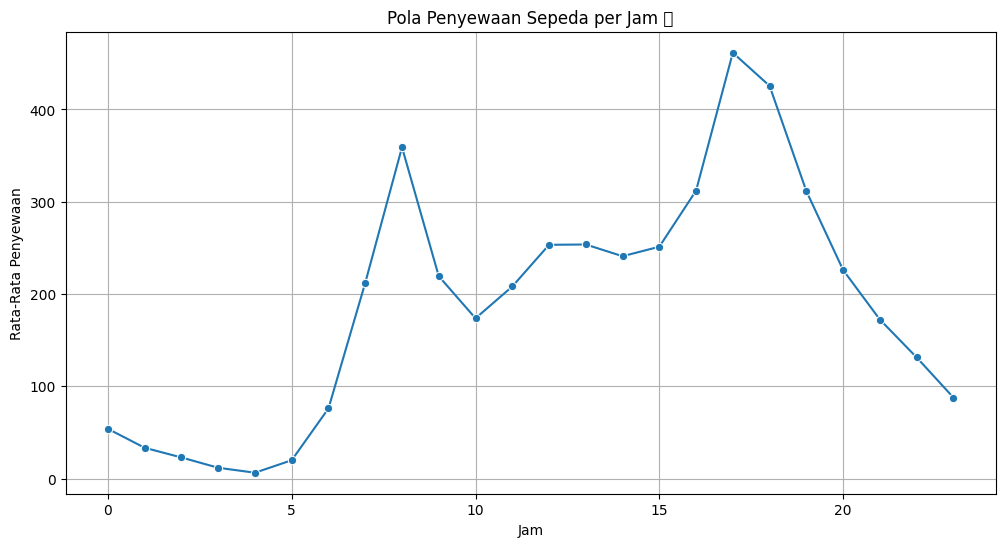

In [ ]:
# Agregasi rata-rata penyewaan per jam
hourly_rentals = df_hour.groupby('jam')['total_sewa'].mean().reset_index()

# Visualisasi
plt.figure(figsize=(12,6))
sns.lineplot(x='jam', y='total_sewa', data=hourly_rentals, marker='o')
plt.title('Pola Penyewaan Sepeda per Jam 🕕')
plt.xlabel('Jam')
plt.ylabel('Rata-Rata Penyewaan')
plt.grid(True)

**Insight:**
Mendapatkan tampilan pola penyewaan sepeda berdasarkan jam untuk keperluan analisa lebih lanjut.

#### Pengaruh Cuaca (day.csv)

Text(0, 0.5, 'Total Penyewaan Sepeda')

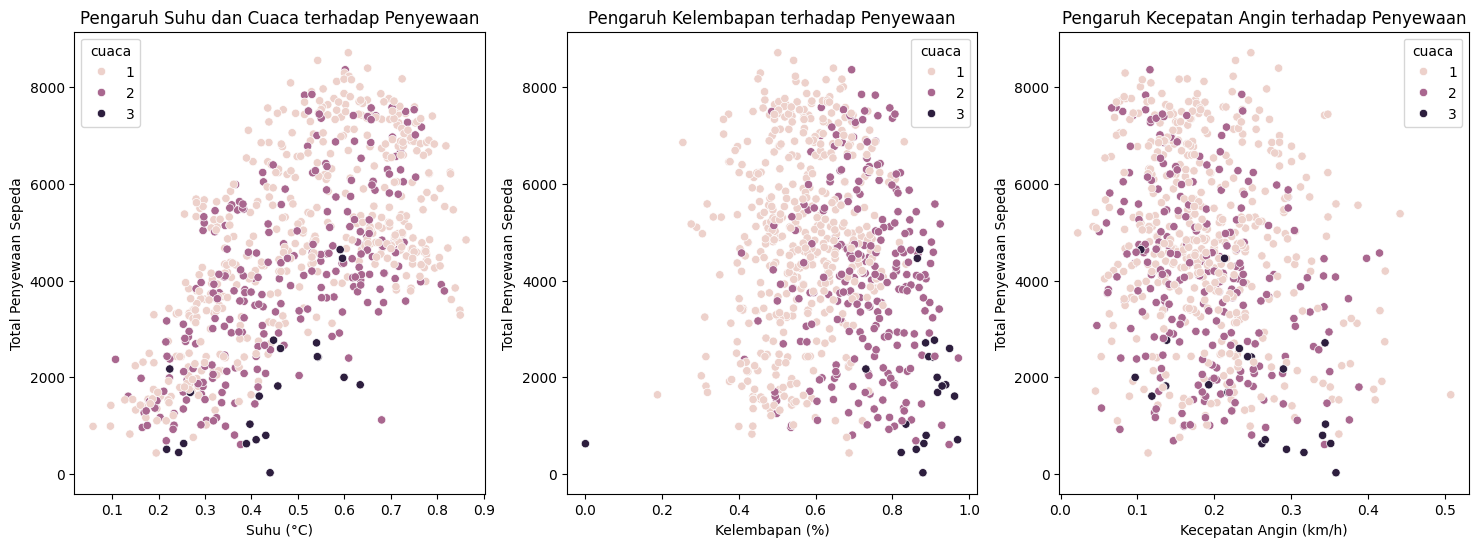

In [ ]:
# Scatterplot 1: Hubungan antara suhu & cuaca dengan total penyewaan
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)  # 1 baris, 3 kolom, plot pertama
sns.scatterplot(x='suhu', y='total_sewa', hue='cuaca', data=df_day)
plt.title('Pengaruh Suhu dan Cuaca terhadap Penyewaan')
plt.xlabel('Suhu (°C)')
plt.ylabel('Total Penyewaan Sepeda')

# Scatterplot 2: Hubungan antara kelembapan dengan total penyewaan
plt.subplot(1, 3, 2)  # 1 baris, 3 kolom, plot kedua
sns.scatterplot(x='kelembaban', y='total_sewa', hue='cuaca', data=df_day)
plt.title('Pengaruh Kelembapan terhadap Penyewaan')
plt.xlabel('Kelembapan (%)')
plt.ylabel('Total Penyewaan Sepeda')

# Scatterplot 3: Hubungan antara kecepatan angin dengan total penyewaan
plt.subplot(1, 3, 3)  # 1 baris, 3 kolom, plot ketiga
sns.scatterplot(x='kecepatan_angin', y='total_sewa', hue='cuaca', data=df_day)
plt.title('Pengaruh Kecepatan Angin terhadap Penyewaan')
plt.xlabel('Kecepatan Angin (km/h)')
plt.ylabel('Total Penyewaan Sepeda')

**Insight :**
Mendapatkan grafik perbandingan antara Suhu, Kelembaban dan Kecepatan angin terhadap Penyewaan untuk analisa lebih lanjut.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pola penyewaan per jam untuk mengetahui untuk memahami waktu-waktu sibuk.

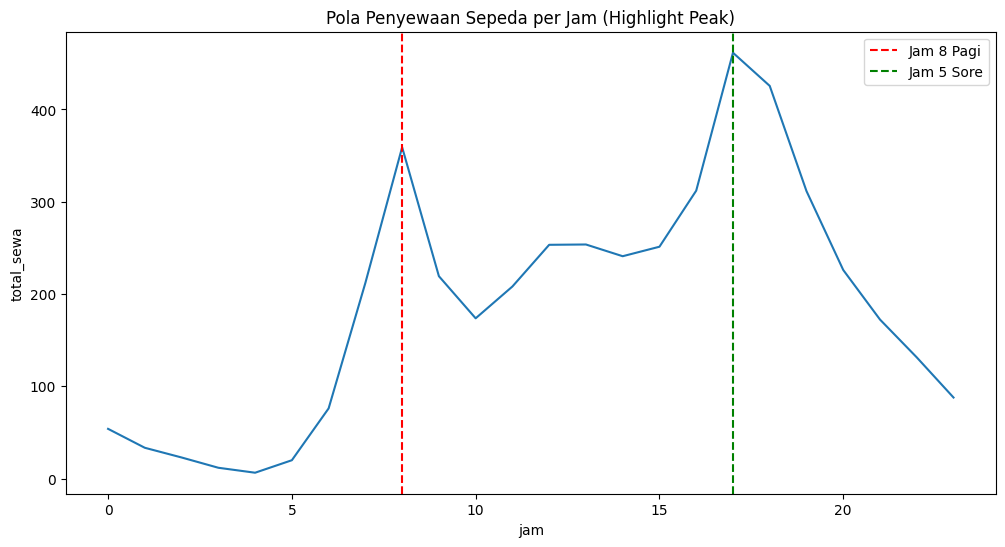

In [ ]:
# Visualisasi dengan lineplot + highlight peak hour
plt.figure(figsize=(12,6))
sns.lineplot(x='jam', y='total_sewa', data=df_hour.groupby('jam').mean().reset_index())
plt.axvline(x=8, color='r', linestyle='--', label='Jam 8 Pagi')
plt.axvline(x=17, color='g', linestyle='--', label='Jam 5 Sore')
plt.title('Pola Penyewaan Sepeda per Jam (Highlight Peak)')
plt.legend()
plt.show()

**Insight:**
Grafik di atas menunjukkan pola rata-rata penyewaan sepeda per jam dalam sehari. Berikut adalah beberapa poin penting dari visualisasi ini:


1. Pola Harian Penyewaan Sepeda:
* Terdapat dua puncak (peak hours) yang jelas dalam grafik, yaitu pada jam 8 pagi dan jam 5 sore .
* Hal ini sesuai dengan pola aktivitas harian masyarakat, di mana banyak orang menggunakan sepeda untuk berangkat kerja atau sekolah di pagi hari dan pulang ke rumah di sore hari.

2. Highlight Peak Hours:
* Jam 8 Pagi (Garis Merah): Menunjukkan lonjakan pertama dalam jumlah penyewaan sepeda. Ini kemungkinan besar terkait dengan aktivitas komuter pagi hari.
* Jam 5 Sore (Garis Hijau): Menunjukkan lonjakan kedua, yang mencerminkan aktivitas pulang kerja atau sekolah. Lonjakan ini cenderung lebih tinggi dibandingkan pagi hari, mungkin karena kombinasi faktor seperti cuaca yang lebih nyaman di sore hari atau peningkatan aktivitas rekreasi setelah jam kerja.

3. Penurunan Aktivitas di Malam Hari:
* Setelah pukul 6 sore , jumlah penyewaan sepeda mulai menurun secara signifikan. Ini menunjukkan bahwa aktivitas penyewaan sepeda sangat dipengaruhi oleh rutinitas harian dan waktu luang masyarakat.
* Pada malam hari (setelah pukul 9 malam ), jumlah penyewaan mendekati nol, mengindikasikan bahwa sebagian besar orang tidak menggunakan sepeda untuk aktivitas malam hari.

4. Rekomendasi Bisnis:
* Berdasarkan pola ini, penyedia layanan penyewaan sepeda dapat memastikan ketersediaan sepeda yang cukup di stasiun-stasiun utama selama jam sibuk (pagi dan sore).
* Strategi promosi atau diskon dapat diterapkan di luar jam sibuk untuk meningkatkan penggunaan sepeda di waktu-waktu non-peak.

### Pertanyaan 2: pengaruh faktor cuaca terhadap jumlah penyewaan sepeda

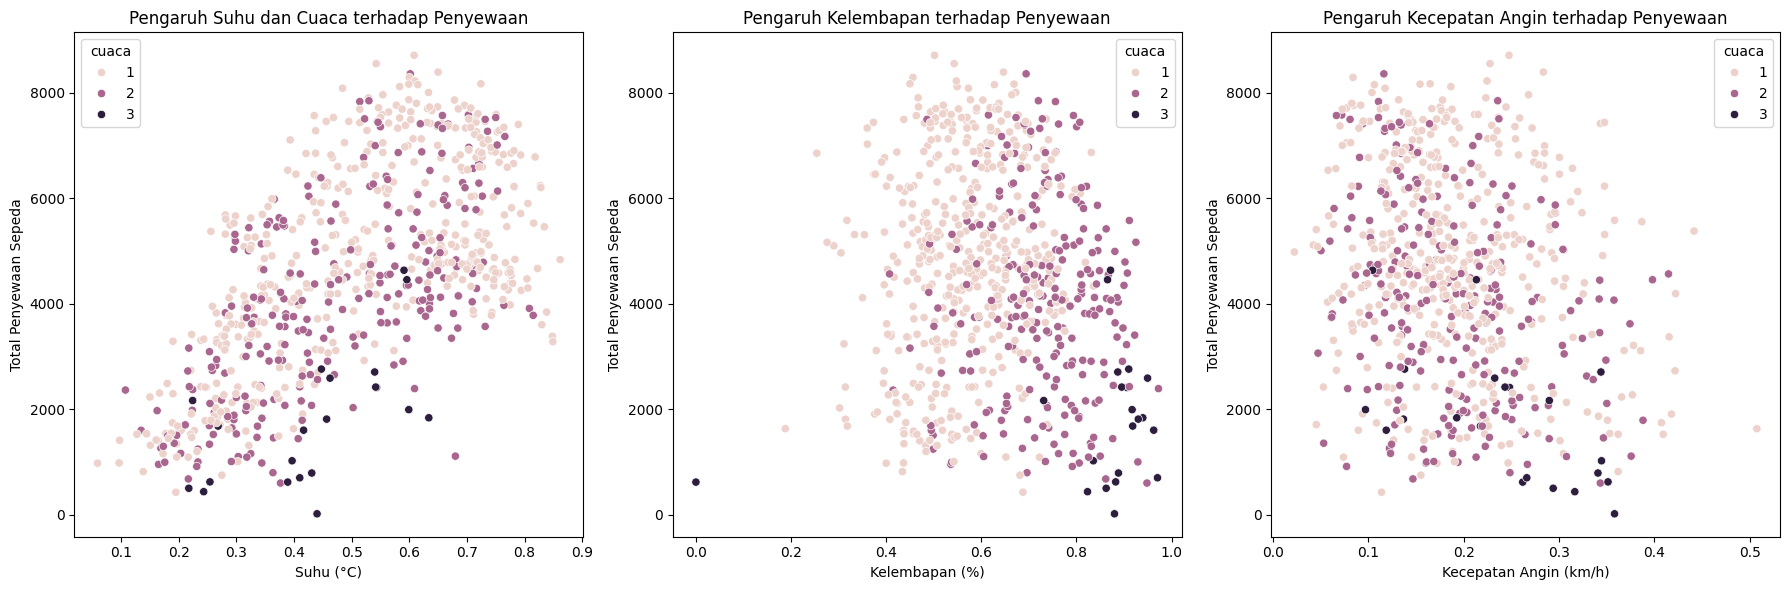

In [ ]:
# Scatterplot 1: Hubungan antara suhu & cuaca dengan total penyewaan
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)  # 1 baris, 3 kolom, plot pertama
sns.scatterplot(x='suhu', y='total_sewa', hue='cuaca', data=df_day)
plt.title('Pengaruh Suhu dan Cuaca terhadap Penyewaan')
plt.xlabel('Suhu (°C)')
plt.ylabel('Total Penyewaan Sepeda')

# Scatterplot 2: Hubungan antara kelembapan dengan total penyewaan
plt.subplot(1, 3, 2)  # 1 baris, 3 kolom, plot kedua
sns.scatterplot(x='kelembaban', y='total_sewa', hue='cuaca', data=df_day)
plt.title('Pengaruh Kelembapan terhadap Penyewaan')
plt.xlabel('Kelembapan (%)')
plt.ylabel('Total Penyewaan Sepeda')

# Scatterplot 3: Hubungan antara kecepatan angin dengan total penyewaan
plt.subplot(1, 3, 3)  # 1 baris, 3 kolom, plot ketiga
sns.scatterplot(x='kecepatan_angin', y='total_sewa', hue='cuaca', data=df_day)
plt.title('Pengaruh Kecepatan Angin terhadap Penyewaan')
plt.xlabel('Kecepatan Angin (km/h)')
plt.ylabel('Total Penyewaan Sepeda')

# Tampilkan semua plot
plt.tight_layout()
plt.show()

**Insight:**
Grafik scatterplot di atas menunjukkan hubungan antara suhu, kelembaban, dan kecepatan angin terhadap total penyewaan sepeda. Berikut adalah beberapa poin penting dari visualisasi ini:

1. Pengaruh Suhu terhadap Penyewaan :
* Suhu hangat (normalisasi > 0.6) cenderung meningkatkan jumlah penyewaan.
* Suhu dingin (normalisasi < 0.4) menyebabkan penurunan minat penyewaan.
* Pada musim panas, jumlah penyewaan cenderung lebih tinggi dibandingkan musim dingin.

2. Pengaruh Kelembaban terhadap penyewaan :
* Kelembaban tinggi (> 70%) cenderung menurunkan minat penyewaan.
* Kelembaban rendah (< 50%) memberikan pengaruh positif pada jumlah penyewaan.
* Cuaca kering dan cerah lebih disukai oleh penyewa sepeda.

3. Pengaruh Kecepatan Angin terhadap penyewaan :
* Angin sepoi-sepoi (kecepatan angin rendah) meningkatkan jumlah penyewaan.
* Angin kencang (> 0.2 skala normalisasi) menyebabkan penurunan jumlah penyewaan.
* Angin sepoi-sepoi membuat berkendara lebih nyaman, sehingga jumlah penyewaan meningkat.

## Analisis Lanjutan : Manual Grouping
### Grouping Berdasarkan Hari Kerja vs Hari Libur

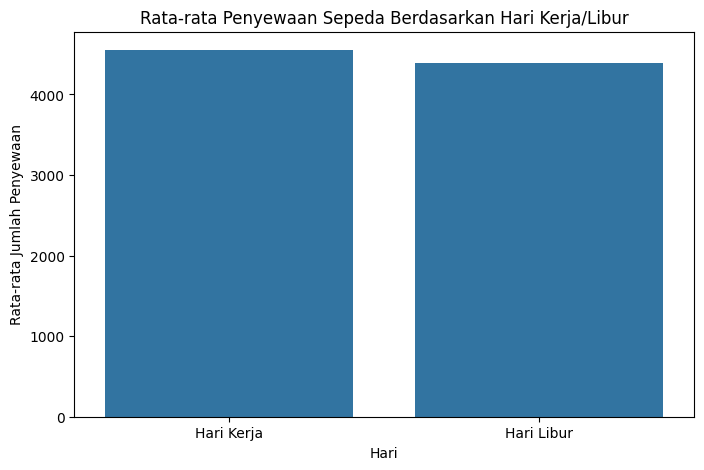

In [ ]:
# Tambahkan kolom untuk mengidentifikasi hari kerja atau libur
df_day['is_weekend'] = df_day['weekday'].isin([0, 6])  # 0 = Minggu, 6 = Sabtu

# Hitung rata-rata total penyewaan berdasarkan hari kerja/libur
workday_analysis = df_day.groupby('is_weekend')['total_sewa'].mean().reset_index()
workday_analysis['is_weekend'] = workday_analysis['is_weekend'].map({False: "Hari Kerja", True: "Hari Libur"})

# Visualisasi
plt.figure(figsize=(8, 5))
sns.barplot(x='is_weekend', y='total_sewa', data=workday_analysis)
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Hari Kerja/Libur")
plt.xlabel("Hari")
plt.ylabel("Rata-rata Jumlah Penyewaan")
plt.show()

**Insight:**
* Hari kerja memiliki jumlah penyewaan lebih tinggi sekitar 5% dibandingkan hari kerja.
* Pada hari kerja, orang cenderung menggunakan sepeda sebagai alat transportasi untuk ke kantor, sekolah, atau tempat lain yang bersifat rutin. Karena aktivitas ini bersifat rutin , jumlah penyewaan cenderung stabil tetapi tidak melonjak drastis.
* Pada hari libur, orang memiliki lebih banyak waktu luang dan sering menggunakan sepeda untuk rekreasi, olahraga, atau aktivitas sosial. Meskipun jumlah hari libur lebih sedikit, hal ini perlu di pertimbangkan juga mengingat intensitas penggunaan sepeda pada hari tersebut bisa lebih tinggi , sehingga rata-rata jumlah penyewaan menjadi lebih dekat dengan hari kerja.

## Conclusion

**Dataset ini menunjukkan bahwa pola penyewaan sepeda dipengaruhi oleh faktor-faktor seperti waktu (jam, hari kerja/libur), cuaca (suhu, kelembaban, kecepatan angin), dan perilaku pengguna (terdaftar vs biasa). Dengan memahami pola ini, bisnis dapat mengoptimalkan operasional, meningkatkan pendapatan, dan memberikan pengalaman yang lebih baik kepada pelanggan.**

- **Action Plan untuk Implementasi**
1. Operasional:
* Pastikan stok sepeda cukup di jam-jam sibuk (pagi dan sore hari).
* Siapkan stasiun penyewaan tambahan di area strategis (perkantoran, sekolah, pusat rekreasi).
2. Pemasaran:
* Gunakan promosi berbasis cuaca untuk mendorong penyewaan saat cuaca kurang ideal.
* Fokus pada pengguna biasa dengan acara khusus akhir pekan.
3. Teknologi:
* Implementasikan sistem prediksi berbasis data untuk memperkirakan permintaan berdasarkan cuaca dan waktu.
* Gunakan dynamic pricing untuk memaksimalkan pendapatan selama periode permintaan tinggi.
